In [2]:
# location: https://mitu.co.in/dataset
# data: Salary_Data.csv

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


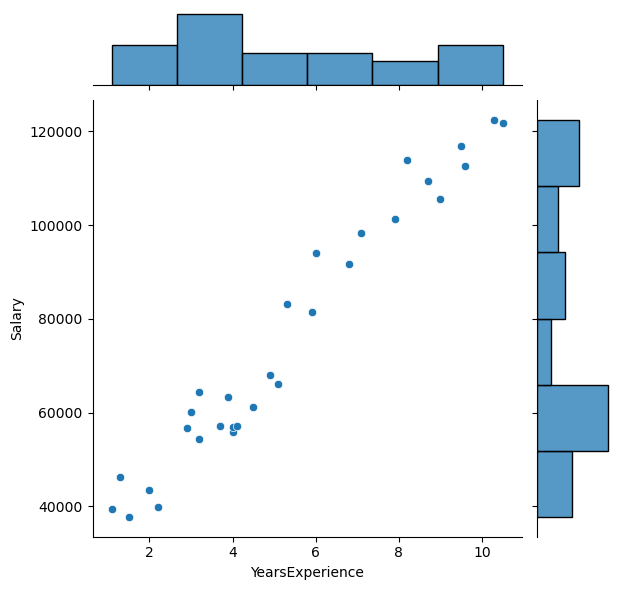

In [12]:
sns.jointplot(x = 'YearsExperience' , y = 'Salary', data = df);

In [25]:
df.shape

(30, 2)

In [14]:
# separate the data

x = df[['YearsExperience']]   # input
y = df['Salary']

In [16]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


### cross validation

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [23]:
x_train.shape

(22, 1)

In [27]:
x_test.shape

(8, 1)

### Build the model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(x_train, y_train)

LinearRegression()

### Evalute

In [37]:
y_pred = lr.predict(x_test)

In [39]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [41]:
result = pd.DataFrame({
    'actaul': y_test,
    'predicted': y_pred
})
result

,actaul,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [45]:
sum(abs((y_test - y_pred) / len(y_pred)))

3508.5455930660555

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [49]:
# MSE (mean squared error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [51]:
# RMSE
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

4733.70258289858

In [61]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [53]:
# actual accuracy/ coe of determination/ r2_score
from  sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [55]:
lr.score(x, y)

0.955975487542377

In [59]:
lr.coef_, lr.intercept_

(array([9379.71049195]), 26986.691316737248)

In [63]:
lr.predict([[12]])

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [71]:
y_pred_entire = lr.predict(x)

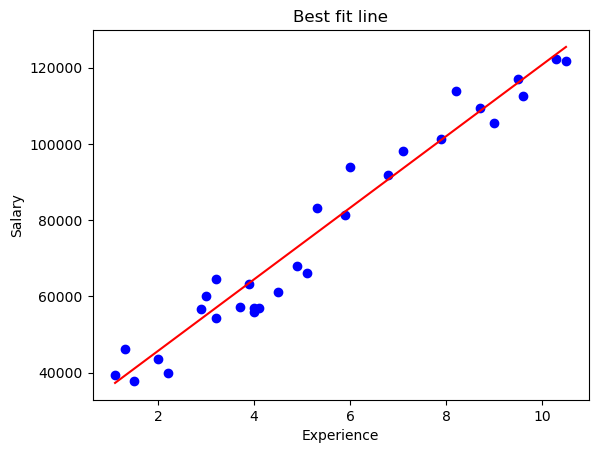

In [73]:
plt.title('Best fit line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y, color = 'blue');
plt.plot(x, y_pred_entire, color = 'red');

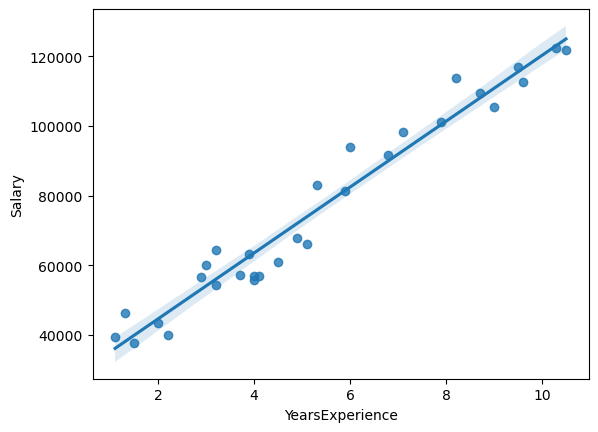

In [89]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = df);